# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from plotnine import *
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize

In [ ]:
penguins = pd.read_csv("/content/penguins.csv")
penguins = penguins.dropna()
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
lr = LinearRegression()
enc = OneHotEncoder()
lg = LogisticRegression()

ct = ColumnTransformer(
    [
    ('dummify_i', enc, ['island']),
    ('dummify_sex', enc, ['sex'])],
    remainder = 'passthrough'
)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [ ]:
X = penguins.drop('species', axis=1)
y = penguins['species']

In [ ]:
# First kNN model
my_pipeline1 = Pipeline(
    [('dummify',ct), ('knn', KNeighborsClassifier(n_neighbors = 3))]
)

In [ ]:
my_pipeline1.fit(X, y)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
ypreds = my_pipeline1.predict(X)
ypreds

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

0.987987987987988

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[145,   0,   1],
       [  1,  66,   1],
       [  1,   0, 118]])

In [ ]:
# Compute Precision, Recall, and F1-Score
report = classification_report(y, ypreds, target_names=penguins['species'].unique())
print(report)

# AUC - One vs Rest approach
# Binarize the output
y_test_bin = label_binarize(y, classes=penguins['species'].unique())
ypreds_bin = label_binarize(ypreds, classes=penguins['species'].unique())

for i, label in enumerate(penguins['species'].unique()):
    auc = roc_auc_score(y_test_bin[:, i], ypreds_bin[:, i])
    print(f"AUC for {label}: {auc}")

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
      Gentoo       1.00      0.97      0.99        68
   Chinstrap       0.98      0.99      0.99       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333

AUC for Adelie: 0.9912277488828657
AUC for Gentoo: 0.9911254221314694
AUC for Chinstrap: 0.9852941176470589


In [ ]:
# 2nd kNN Model
my_pipeline2 = Pipeline(
    [('dummify',ct), ('knn', KNeighborsClassifier(n_neighbors=10))]
)

In [ ]:
my_pipeline2.fit(X, y)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [ ]:
ypreds2 = my_pipeline2.predict(X)
ypreds2

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [ ]:
accuracy = accuracy_score(y, ypreds2)
accuracy

0.954954954954955

In [ ]:
confusedmetric = confusion_matrix(y, ypreds2)
confusedmetric

array([[142,   0,   4],
       [  2,  61,   5],
       [  4,   0, 115]])

In [ ]:
# Compute Precision, Recall, and F1-Score
report = classification_report(y, ypreds2, target_names=penguins['species'].unique())
print(report)

# AUC - One vs Rest approach
# Binarize the output
y_test_bin = label_binarize(y, classes=penguins['species'].unique())
ypreds_bin = label_binarize(ypreds2, classes=penguins['species'].unique())

for i, label in enumerate(penguins['species'].unique()):
    auc = roc_auc_score(y_test_bin[:, i], ypreds_bin[:, i])
    print(f"AUC for {label}: {auc}")

              precision    recall  f1-score   support

      Adelie       0.96      0.97      0.97       146
      Gentoo       1.00      0.90      0.95        68
   Chinstrap       0.93      0.97      0.95       119

    accuracy                           0.95       333
   macro avg       0.96      0.95      0.95       333
weighted avg       0.96      0.95      0.95       333

AUC for Adelie: 0.9702585891143505
AUC for Gentoo: 0.9621652399277469
AUC for Chinstrap: 0.9485294117647058


In [ ]:
# 1st Decision Tree Model
my_pipeline3 = Pipeline(
    [('dummify',ct), ('dt', DecisionTreeClassifier(ccp_alpha = 0.25))]
)

In [ ]:
my_pipeline3.fit(X, y)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('dt', DecisionTreeClassifier(ccp_alpha=0.25))])

In [ ]:
ypreds3 = my_pipeline3.predict(X)
ypreds3

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [ ]:
accuracy = accuracy_score(y, ypreds3)
accuracy

1.0

In [ ]:
confusedmetric = confusion_matrix(y, ypreds3)
confusedmetric

array([[146,   0,   0],
       [  0,  68,   0],
       [  0,   0, 119]])

In [ ]:
# Compute Precision, Recall, and F1-Score
report = classification_report(y, ypreds3, target_names=penguins['species'].unique())
print(report)

# AUC - One vs Rest approach
# Binarize the output
y_test_bin = label_binarize(y, classes=penguins['species'].unique())
ypreds_bin = label_binarize(ypreds3, classes=penguins['species'].unique())

for i, label in enumerate(penguins['species'].unique()):
    auc = roc_auc_score(y_test_bin[:, i], ypreds_bin[:, i])
    print(f"AUC for {label}: {auc}")

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
      Gentoo       1.00      1.00      1.00        68
   Chinstrap       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

AUC for Adelie: 1.0
AUC for Gentoo: 1.0
AUC for Chinstrap: 1.0


In [ ]:
# 2nd Decision Tree Model
my_pipeline4 = Pipeline(
    [('dummify',ct), ('dt', DecisionTreeClassifier(ccp_alpha = 0.5))]
)

In [ ]:
my_pipeline4.fit(X, y)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('dt', DecisionTreeClassifier(ccp_alpha=0.5))])

In [ ]:
ypreds4 = my_pipeline4.predict(X)
ypreds4

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [ ]:
accuracy = accuracy_score(y, ypreds4)
accuracy

0.43843843843843844

In [ ]:
confusedmetric = confusion_matrix(y, ypreds4)
confusedmetric

array([[146,   0,   0],
       [ 68,   0,   0],
       [119,   0,   0]])

In [ ]:
# Compute Precision, Recall, and F1-Score
report = classification_report(y, ypreds4, target_names=penguins['species'].unique())
print(report)

# AUC - One vs Rest approach
# Binarize the output
y_test_bin = label_binarize(y, classes=penguins['species'].unique())
ypreds_bin = label_binarize(ypreds4, classes=penguins['species'].unique())

for i, label in enumerate(penguins['species'].unique()):
    auc = roc_auc_score(y_test_bin[:, i], ypreds_bin[:, i])
    print(f"AUC for {label}: {auc}")

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       146
      Gentoo       0.00      0.00      0.00        68
   Chinstrap       0.00      0.00      0.00       119

    accuracy                           0.44       333
   macro avg       0.15      0.33      0.20       333
weighted avg       0.19      0.44      0.27       333

AUC for Adelie: 0.5
AUC for Gentoo: 0.5
AUC for Chinstrap: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


# Plot

In [ ]:
y_bin = label_binarize(y, classes=penguins['species'].unique())
ypreds_bin = label_binarize(ypreds, classes=penguins['species'].unique())

In [ ]:
for i, label in enumerate(penguins['species'].unique()):
    auc = roc_auc_score(y_test_bin[:, i], ypreds_bin[:, i])
    print(f"AUC for {label}: {auc}")

AUC for Adelie: 0.9912277488828657
AUC for Gentoo: 0.9911254221314694
AUC for Chinstrap: 0.9852941176470589


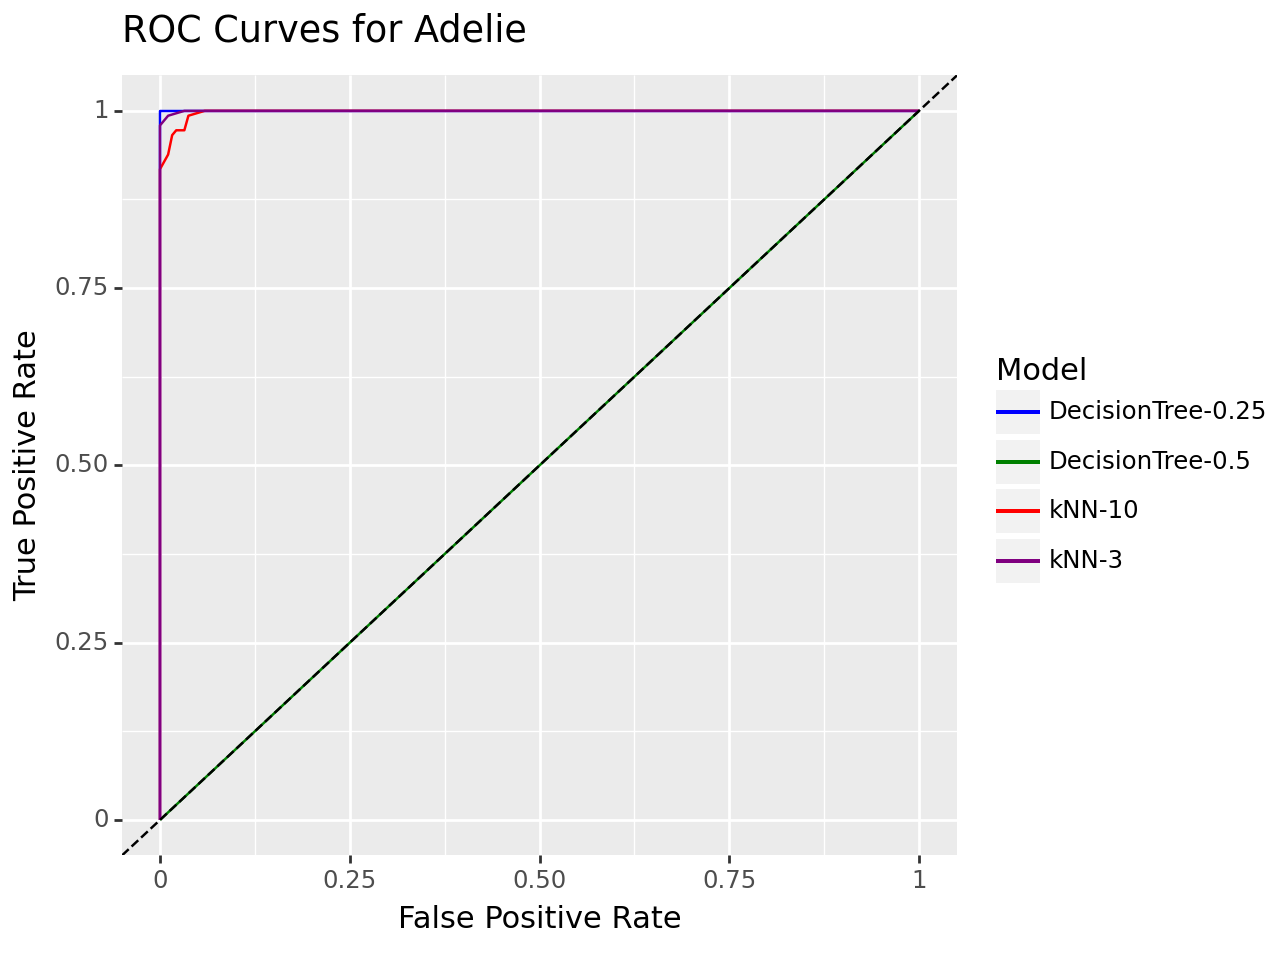

In [ ]:
# Chat GPT assisted organizing the data
# Binarize the output for the "Adelie" species
y_bin_adelie = label_binarize(y, classes=penguins['species'].unique())[:, penguins['species'].unique().tolist().index('Adelie')]

models = [my_pipeline1, my_pipeline2, my_pipeline3, my_pipeline4]
model_names = ['kNN-3', 'kNN-10', 'DecisionTree-0.25', 'DecisionTree-0.5']
roc_data = pd.DataFrame()

for model, name in zip(models, model_names):
    # Get probabilities for the "Adelie" class from each model
    y_probs_adelie = model.predict_proba(X)[:, penguins['species'].unique().tolist().index('Adelie')]

    # Compute ROC curve for "Adelie"
    fpr_adelie, tpr_adelie, _ = roc_curve(y_bin_adelie, y_probs_adelie)
    auc_adelie = roc_auc_score(y_bin_adelie, y_probs_adelie)

    # Prepare data for plotting
    model_roc = pd.DataFrame({'FPR': fpr_adelie, 'TPR': tpr_adelie, 'Model': name, 'AUC': auc_adelie})
    roc_data = pd.concat([roc_data, model_roc])

# Plotting the ROC curves for all models
roc_plot = (
    ggplot(roc_data, aes(x='FPR', y='TPR', color='Model')) +
    geom_line() +
    geom_abline(linetype='dashed') +
    labs(x='False Positive Rate', y='True Positive Rate', title='ROC Curves for Adelie') +
    theme(legend_position='right') +
    scale_color_manual(values=['blue', 'green', 'red', 'purple'])
)

print(roc_plot)
